In [164]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


"""
论文复现
标题：基于改进卷积神经网络的车牌识别方法
"""

# 关闭科学计数
np.set_printoptions(suppress=True)

# 训练集和测试集
# 58个类别 
# 55个图片
# 分辨率32*32
train = []
# 58个类别
label = []

# 初始化训练集
for i in range(34):
    data = np.load(f'E:\dataset\chars74k-np\{i}.npy')
    train.append(data)
train = np.array(train).astype(int)

# 初始化标签
for i in range(34):
    data = np.load(f'E:\dataset\chars74k-np\{i}_labels.npy')
    data = np.full_like(data,i)
    label.append(data)
label = np.array(label).astype(int)

# 测试集
test = train[28:,:]
test_label = label[28:,]

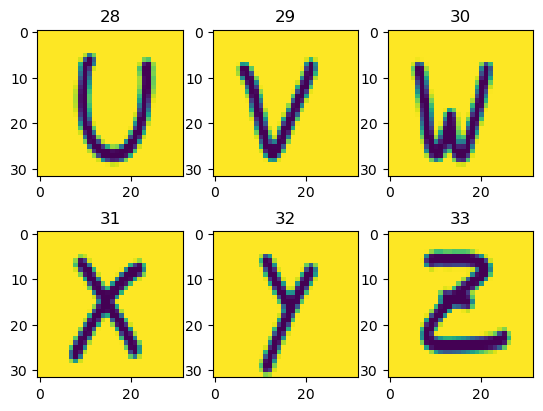

In [165]:
# 验证测试数据数据
for i in range(1, 7):
    plt.subplot(2,3,i)
    plt.imshow(test[i - 1][0])
    plt.title(f'{test_label[i - 1][0]}')

In [166]:
train = train.reshape(-1,32,32)
test = test.reshape(-1,32,32)
label = label.reshape(-1)
test_label = test_label.reshape(-1)
print('train:',train.shape,label.shape)
print('test:',test.shape,test_label.shape)

train: (1870, 32, 32) (1870,)
test: (330, 32, 32) (330,)


In [167]:
# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(96, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(120, (5,5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(34, activation='softmax')
])


model.compile(optimizer=tf.optimizers.Adam(0.003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(train, label, epochs=30)

Epoch 1/30
59/59 [==============================] - 1s 10ms/step - loss: 4.8625 - accuracy: 0.0781
Epoch 2/30
59/59 [==============================] - 1s 11ms/step - loss: 2.8118 - accuracy: 0.2187
Epoch 3/30
59/59 [==============================] - 1s 10ms/step - loss: 2.3158 - accuracy: 0.3524
Epoch 4/30
59/59 [==============================] - 1s 10ms/step - loss: 1.9522 - accuracy: 0.4283
Epoch 5/30
59/59 [==============================] - 1s 11ms/step - loss: 1.6928 - accuracy: 0.5021
Epoch 6/30
59/59 [==============================] - 1s 12ms/step - loss: 1.5209 - accuracy: 0.5433
Epoch 7/30
59/59 [==============================] - 1s 12ms/step - loss: 1.2937 - accuracy: 0.6118
Epoch 8/30
59/59 [==============================] - 1s 10ms/step - loss: 1.2205 - accuracy: 0.6299
Epoch 9/30
59/59 [==============================] - 1s 25ms/step - loss: 1.1105 - accuracy: 0.6503
Epoch 10/30
59/59 [==============================] - 1s 11ms/step - loss: 0.9624 - accuracy: 0.6898
Epoch 11/

In [168]:
# 评估模型
test = Image.open('./test.png')
test = np.array(test.resize((32,32)).convert('L'))
z = model.predict(np.array([test]))  # 使用数组进行预测


1/1 [==============================] - 0s 60ms/step


array([[0.00000484, 0.00000031, 0.00001715, 0.0000189 , 0.00001664,
        0.00000442, 0.00046496, 0.00004713, 0.00027323, 0.00000006,
        0.00000134, 0.27122635, 0.00145913, 0.00009182, 0.27116337,
        0.00251399, 0.00003358, 0.00012955, 0.00000603, 0.00000187,
        0.00000101, 0.00000008, 0.00006832, 0.12210186, 0.00000064,
        0.00032968, 0.00000003, 0.        , 0.00148425, 0.00034315,
        0.00005027, 0.3281454 , 0.00000038, 0.0000002 ]], dtype=float32)